## Лабораторная работа 1. Построение байесовского классификатора по выборке двумерных нормально распределенных векторов
---

#### $\S$ 1. Постановка задачи

Пусть заданы априорные вероятности появления классов $P(\Omega_1)$, $P(\Omega_2)$ и плотности распределения признаков в классах $p(\mathrm{x}|\Omega_1)$, $p(\mathrm{x}|\Omega_2)$. Тогда

$$
\mathrm{x}\in\Omega_1 \Leftrightarrow ~p(\mathrm{x}|\Omega_1)P(\Omega_1) > p(\mathrm{x}|\Omega_2)P(\Omega_2).
$$

Предположим, что вектор признаков нормально распределен в классах $\Omega_1$, $\Omega_2$ и

$$
p(\mathrm{x}|\Omega_i) = \frac{1}{(2\pi)^{n/2} \sqrt{\det\mathrm{S}_i}} e^{-\frac{1}{2}(\mathrm{x}-\mathrm{m}_i)^T\mathrm{S}_i^{-1}(\mathrm{x}-\mathrm{m}_i)},
$$

где $\mathrm{S}_i$ -- ковариационная матрица вектор признаков. В этом случае

$$
\mathrm{x}\in\Omega_1 \Leftrightarrow ~\frac{P(\Omega_1)}{\sqrt{\det\mathrm{S}_1}} e^{-\frac{1}{2}(\mathrm{x}-\mathrm{m}_1)^T\mathrm{S}_1^{-1}(\mathrm{x}-\mathrm{m}_1)} > \frac{P(\Omega_2)}{\sqrt{\det\mathrm{S}_2}} e^{-\frac{1}{2}(\mathrm{x}-\mathrm{m}_2)^T\mathrm{S}_2^{-1}(\mathrm{x}-\mathrm{m}_2)}.
$$

Прологарифмируем последнее неравенство и обозначим:

$$
d_i(\mathrm{x}) = \ln P(\Omega_i) - \frac{1}{2}\ln\det\mathrm{S}_i - \frac{1}{2}(\mathrm{x}-\mathrm{m}_i)^T\mathrm{S}_i^{-1}(\mathrm{x}-\mathrm{m}_i)
$$

Тогда

$$
\mathrm{x}\in\Omega_1 \Leftrightarrow ~d_1(\mathrm{x}) > d_2(\mathrm{x}).
$$

Аналогичный результат имеет место при построении байесовского классификатора для разделения $m$ классов

$$
\mathrm{x}\in\Omega_i \Leftrightarrow ~d_i(\mathrm{x}) > d_j(\mathrm{x}),~~\forall j\ne i.
$$

**Задание.** Используя байесовский классификатор, построить множества предпочтения классов $\Omega_1$, $\Omega_2$, предполгая что вектор признаков каждого класса представляет собой двумерную нормально распределенную случайную величину с неизвестными параметрами.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
P_1 = 0.4
P_2 = 0.6
mu_1 = [0, 0]
mu_2 = [3, 2]
sigma_1 = [2, 1]
sigma_2 = [2, 1]

In [93]:
np.random.seed(44222)
N = 50
X_1 = np.random.normal(mu_1[0], sigma_1[0], N)
X_2 = np.random.normal(mu_2[0], sigma_2[0], N)
Y_1 = np.random.normal(mu_1[1], sigma_1[1], N)
Y_2 = np.random.normal(mu_2[1], sigma_2[1], N)

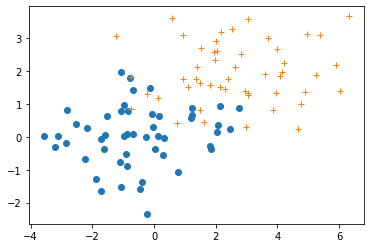

In [94]:
plt.figure()
plt.plot(X_1, Y_1, 'o')
plt.plot(X_2, Y_2, '+')

#### $\S$ 2. Вычисление оценок числовых характеристик распределений векторов в классах

$$
\hat{\mathrm{m}} = \begin{pmatrix}\bar{x} & \bar{y}\end{pmatrix}^T = \frac{1}{N} \sum\limits_{k=1}^N \mathrm{x}_k,~~~~\mathrm{x}_k = \begin{pmatrix}x_{k} & y_k\end{pmatrix}^T
$$

In [95]:
vec_coords1 = np.column_stack((X_1, Y_1)) #аналог np.array(list(zip(X_1, Y_1)))
vec_coords2 = np.column_stack((X_2, Y_2))

In [96]:
''' Ваш код '''

m_1 = vec_coords1.mean(axis=0) # m == [𝑥¯, 𝑦¯]
m_2 = vec_coords2.mean(axis=0)

In [97]:
m_1

array([-0.51275508,  0.0333622 ])

#### $\S$ 3. Вычисление выборочных ковариационных матриц $\bar{\mathrm{S}} = \bar{\mathrm{S}}(\mathrm{x}_1,\dots,\mathrm{x}_N)$

Пусть $\mathrm{x}_k = \begin{pmatrix}x_{k} & y_k\end{pmatrix}^T$, $k = 1,\dots, N$. Тогда

$$
\hat{\mathrm{S}} = \frac{1}{N}\sum\limits_{k=1}^N (\mathrm{x}_k - \hat{\mathrm{m}})\cdot (\mathrm{x}_k - \hat{\mathrm{m}})^T = \begin{pmatrix}\frac{1}{N}\sum\limits_{k=1}^N (x_k - \bar{x})^2 & \frac{1}{N}\sum\limits_{k=1}^N (x_k - \bar{x})(y_k - \bar{y})\\ \frac{1}{N}\sum\limits_{k=1}^N (x_k - \bar{x})(y_k - \bar{y}) & \frac{1}{N}\sum\limits_{k=1}^N (y_k - \bar{y})^2\end{pmatrix}.
$$

In [98]:
def get_S(vec_coords, m):
#     S_row1_col1 = (np.column_stack((vec_coords[:,0] - m[0], vec_coords[:,1]))** 2).mean(axis=0)
#     S_row2_col2 = (np.column_stack((vec_coords[:,0], vec_coords[:,1] - m[1]))** 2).mean(axis=0)
#     S_rowcol12 = (np.multiply(np.column_stack((vec_coords[:,0] - m[0], vec_coords[:,1])),
#                       np.column_stack((vec_coords[:,0], vec_coords[:,1] - m[1])))).mean(axis=0)
    
#     S = [[0 for x in range(2)] for y in range(2)]
    
#     S[0][0] = S_row1_col1
#     S[1][1] = S_row2_col2
#     S[0][1] = S_rowcol12
#     S[1][0] = S_rowcol12
#     return np.array(S)
#     np.dot((vec_coords1 - m_1).T, (vec_coords1 - m_1))/N
      return np.cov(vec_coords.T, bias=True)
    


In [99]:
S_1 = get_S(vec_coords1, m_1)
S_2 = get_S(vec_coords2, m_2)

In [100]:
S_1

array([[2.38647954, 0.19055004],
       [0.19055004, 0.79330449]])

In [101]:
S_2

array([[3.2692165 , 0.1346661 ],
       [0.1346661 , 0.81345578]])

#### $\S$ 4.  Вычисление решающих функций, определяемых байесовским классификатором

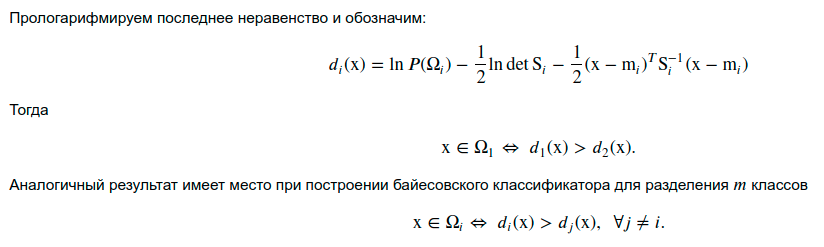

In [102]:
S_1

array([[2.38647954, 0.19055004],
       [0.19055004, 0.79330449]])

In [103]:
sign, logdet = np.linalg.slogdet(S_1)

In [104]:
sign, logdet

(1.0, 0.6189060684120136)

In [110]:
def dist(x, S, m, P):
    # Функция d_i(x)
    sign, logdet = np.linalg.slogdet(S)
    d_i = np.log(P) - logdet/2 - np.dot(np.dot((x - m).T, np.linalg.inv(S)),(x - m))/2  
    
    return d_i

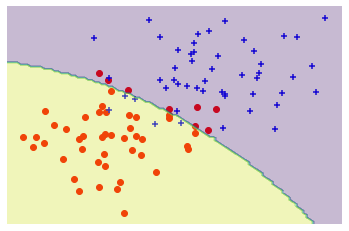

In [111]:
# Строим множества предпочтения классов. Править не нужно
ax = plt.gca()
r = 1
g = 0
b = 0
ax.scatter(X_1, Y_1, marker = 'o', c = [[r, g, b]])
r = 0
g = 0
b = 1
ax.scatter(X_2, Y_2, marker = '+', c = [[r, g, b]])
ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num = 100), np.linspace(*ylim, num = 100))
#print([xx[i, j], yy[i, j]])
d = np.zeros(xx.shape)
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        '''
        Для вектора x = (i, j) вычисляем d_{i,j} = (sign(d_1(x) - d_2(x)) + 1) / 2
        Классификация: если d_{i,j} = 0, то x\in\Omega_2, если d_{i,j} = 1, то x\in\Omega_1
        '''
        d[i, j] = np.sign(dist([xx[i, j], yy[i, j]], S_1, m_1, P_1) - dist([xx[i, j], yy[i, j]], S_2, m_2, P_2)) + 1
ax.contourf(xx, yy, 0.5 * d, alpha = 0.3)

### Литература

1. Лепский А.Е., Броневич А.Г. Математические методы распознавания образов: Курс лекций. -- Таганрог: Изд-во ТТИ ЮФУ, 2009. - 155 с.

2. Местецкий Л.М. Математические методы распознавания образов: Курс лекций. -- М: МГУ, 2004. - 85 с.